#**ZOMATO RESTAURANT SUCCESS FACTORS ANALYSIS**

---




#**About This Project :**
 In this project, we aim to analyze Zomato restaurant data to identify key factors
 that contribute to the success of restaurants, as measured by their ratings. By
 exploring various features such as location, cuisine, pricing, and service
 offerings, we aim to provide insights that can help restaurant owners and
 Zomato users make informed decisions

 Exploratory Data Analysis (EDA) serves as an initial phase in the realm of
 Machine Learning, extensively employed to gain a profound understanding
 of the dataset. While not mandatory for model development, EDA is strongly
 recommended as it facilitates a nuanced comprehension of the data. When
 executed meticulously, EDA unveils insights that may not be readily
 apparent.

In [1]:
# Import all necessary libaries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
LB=LabelEncoder()

In [2]:
# Importing my dataset
data=pd.read_csv('Indian-Resturants.csv')
data.head()

,res_id,name,establishment,url,address,city,city_id,locality,latitude,longitude,...,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,['Quick Bites'],https://www.zomato.com/agra/bikanervala-khanda...,"Kalyani Point, Near Tulsi Cinema, Bypass Road,...",Agra,34,Khandari,27.211450,78.002381,...,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,['Quick Bites'],https://www.zomato.com/agra/mama-chicken-mama-...,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra,34,Agra Cantt,27.160569,78.011583,...,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-2-sh...,"62/1, Near Easy Day, West Shivaji Nagar, Goalp...",Agra,34,Shahganj,27.182938,77.979684,...,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,['Quick Bites'],https://www.zomato.com/agra/bhagat-halwai-civi...,"Near Anjana Cinema, Nehru Nagar, Civil Lines, ...",Agra,34,Civil Lines,27.205668,78.004799,...,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,['Casual Dining'],https://www.zomato.com/agra/the-salt-cafe-kitc...,"1C,3rd Floor, Fatehabad Road, Tajganj, Agra",Agra,34,Tajganj,27.157709,78.052421,...,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1


**Data Overview:**

  Explore the basic characteristics of the dataset, including dimensions, data
 types, and missing values.
  

In [3]:
#Understanding the dtypes and null values in my data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211944 entries, 0 to 211943
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   res_id                211944 non-null  int64  
 1   name                  211944 non-null  object 
 2   establishment         211944 non-null  object 
 3   url                   211944 non-null  object 
 4   address               211810 non-null  object 
 5   city                  211944 non-null  object 
 6   city_id               211944 non-null  int64  
 7   locality              211944 non-null  object 
 8   latitude              211944 non-null  float64
 9   longitude             211944 non-null  float64
 10  zipcode               48757 non-null   object 
 11  country_id            211944 non-null  int64  
 12  locality_verbose      211944 non-null  object 
 13  cuisines              210553 non-null  object 
 14  timings               208070 non-null  object 
 15  

In [4]:
data.describe()

,res_id,city_id,latitude,longitude,country_id,average_cost_for_two,price_range,aggregate_rating,votes,photo_count,opentable_support,delivery,takeaway
count,2.119440e+05,211944.000000,211944.000000,211944.000000,211944.0,211944.000000,211944.000000,211944.000000,211944.000000,211944.000000,211896.0,211944.000000,211944.0
mean,1.349411e+07,4746.785434,21.499758,77.615276,1.0,595.812229,1.882535,3.395937,378.001864,256.971224,0.0,-0.255907,-1.0
std,7.883722e+06,5568.766386,22.781331,7.500104,0.0,606.239363,0.892989,1.283642,925.333370,867.668940,0.0,0.964172,0.0
min,5.000000e+01,1.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.000000,-18.000000,0.000000,0.0,-1.000000,-1.0
25%,3.301027e+06,11.000000,15.496071,74.877961,1.0,250.000000,1.000000,3.300000,16.000000,3.000000,0.0,-1.000000,-1.0
50%,1.869573e+07,34.000000,22.514494,77.425971,1.0,400.000000,2.000000,3.800000,100.000000,18.000000,0.0,-1.000000,-1.0
75%,1.881297e+07,11306.000000,26.841667,80.219323,1.0,700.000000,2.000000,4.100000,362.000000,128.000000,0.0,1.000000,-1.0
max,1.915979e+07,11354.000000,10000.000000,91.832769,1.0,30000.000000,4.000000,4.900000,42539.000000,17702.000000,0.0,1.000000,-1.0


In [5]:
# % of null values in my datasets
data.isnull().sum()/len(data)*100

,0
res_id,0.000000
name,0.000000
establishment,0.000000
url,0.000000
address,0.063224
city,0.000000
city_id,0.000000
locality,0.000000
latitude,0.000000
longitude,0.000000


**Data Wrangling:**

In [6]:
#Dropping the columns which is not required
data.drop(columns=['zipcode','url','address','locality_verbose','timings'], inplace=True)

In [7]:
#for understanding i used to display max columns
pd.set_option("display.max_columns", None)

In [8]:
#removing the unneccessary regex from my imp data
data['establishment']=data['establishment'].str.strip("[]").str.replace("'","").str.strip()

In [9]:
data['cuisines']=data['cuisines'].fillna('unknown')

In [10]:
l=['latitude', 'longitude']
for i in l:
  data[i]=data[i].round(2)

In [11]:
#droping the null values
data=data.dropna()

In [12]:
# Top 5 head
data.head()

,res_id,name,establishment,city,city_id,locality,latitude,longitude,country_id,cuisines,average_cost_for_two,price_range,currency,highlights,aggregate_rating,rating_text,votes,photo_count,opentable_support,delivery,takeaway
0,3400299,Bikanervala,Quick Bites,Agra,34,Khandari,27.21,78.00,1,"North Indian, South Indian, Mithai, Street Foo...",700,2,Rs.,"['Lunch', 'Takeaway Available', 'Credit Card',...",4.4,Very Good,814,154,0.0,-1,-1
1,3400005,Mama Chicken Mama Franky House,Quick Bites,Agra,34,Agra Cantt,27.16,78.01,1,"North Indian, Mughlai, Rolls, Chinese, Fast Fo...",600,2,Rs.,"['Delivery', 'No Alcohol Available', 'Dinner',...",4.4,Very Good,1203,161,0.0,-1,-1
2,3401013,Bhagat Halwai,Quick Bites,Agra,34,Shahganj,27.18,77.98,1,"Fast Food, Mithai",300,1,Rs.,"['No Alcohol Available', 'Dinner', 'Takeaway A...",4.2,Very Good,801,107,0.0,1,-1
3,3400290,Bhagat Halwai,Quick Bites,Agra,34,Civil Lines,27.21,78.00,1,"Desserts, Bakery, Fast Food, South Indian",300,1,Rs.,"['Takeaway Available', 'Credit Card', 'Lunch',...",4.3,Very Good,693,157,0.0,1,-1
4,3401744,The Salt Cafe Kitchen & Bar,Casual Dining,Agra,34,Tajganj,27.16,78.05,1,"North Indian, Continental, Italian",1000,3,Rs.,"['Lunch', 'Serves Alcohol', 'Cash', 'Credit Ca...",4.9,Excellent,470,291,0.0,1,-1


**Basic Statistics:**

 Calculate and visualize the average rating of restaurants.
 Analyze the distribution of restaurant ratings to understand the overall rating
 landscape.

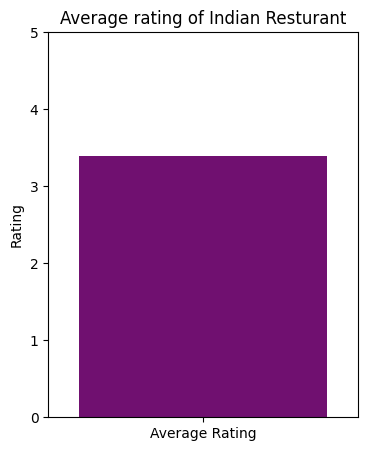

In [13]:
avg_rating=data['aggregate_rating'].mean()
plt.figure(figsize=(4,5))
sns.barplot(x=['Average Rating'], y=avg_rating, color='purple')
plt.ylim(0,5)
plt.title("Average rating of Indian Resturant")
plt.ylabel('Rating')
plt.show()

Indian Restaurant have good rating which reflects the quality of statisfaction from customer

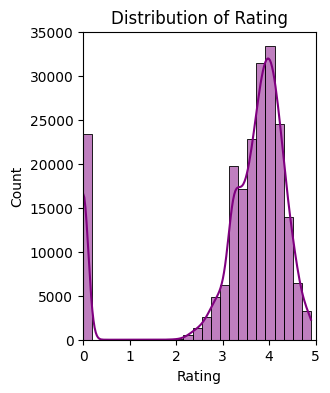

In [14]:
plt.figure(figsize=(3,4))
sns.histplot(x=data['aggregate_rating'], bins=25, kde=True, color='purple')
plt.xlim(0,5)
plt.xlabel('Rating')
plt.title('Distribution of Rating')
plt.show()

Most of restaurant in India have scored statisfactory rating

**Location Analysis:**

Identify the city with the highest concentration of restaurants.
 Visualize the distribution of restaurant ratings across different cities.


In [15]:
#To Find the top 10 city with highest concentration
top_city=data['city'].value_counts().head(10)

<ipython-input-16-ce75c68ee1e3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_city.index, x=top_city.values, palette='viridis')


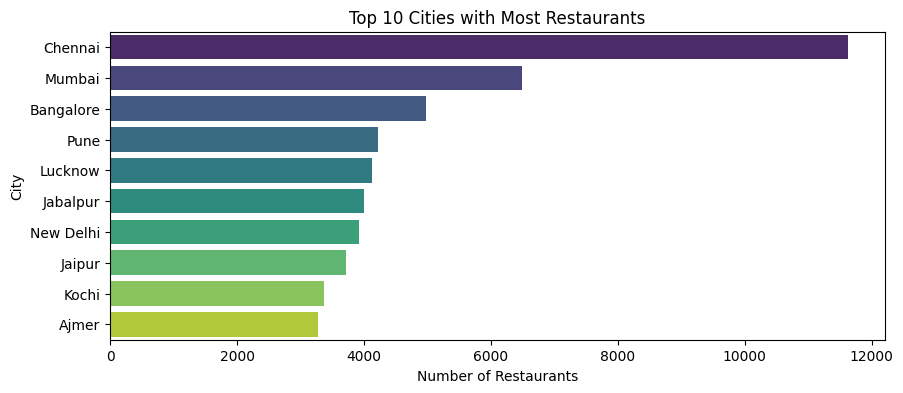

In [16]:
plt.figure(figsize=(10,4))
sns.barplot(y=top_city.index, x=top_city.values, palette='viridis')
plt.title('Top 10 Cities with Most Restaurants')
plt.xlabel('Number of Restaurants')
plt.ylabel('City')
plt.show()

1. Chennai has the highest restaurant count in India.
2. There is huge gap b/w Chennai and mumbai in term restaurants
3. Delhi is a small city but it is fall under in top 10 most retaurants ciy which is very impresive

In [17]:
# Let's figure out the average rating of city who have most restaurants counts
rate=data[data['city'].isin(top_city.index)].groupby(['city'])['aggregate_rating'].mean().sort_values(ascending=False)

<ipython-input-18-9553b7e9502d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rate.values, y=rate.index, palette='viridis')


Text(0.5, 1.0, 'City with distribution of rating')

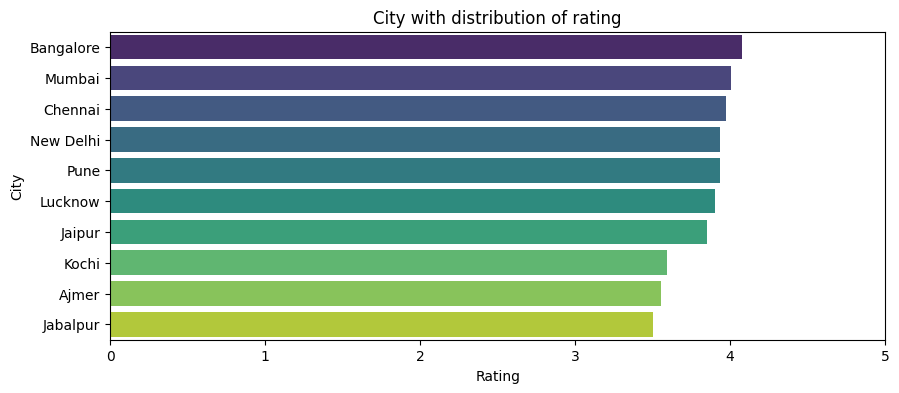

In [18]:
# Visual Presentation
plt.figure(figsize=(10,4))
sns.barplot(x=rate.values, y=rate.index, palette='viridis')
plt.xlabel('Rating')
plt.ylabel('City')
plt.xlim(0,5)
plt.title('City with distribution of rating')

1. Chennai has the highest restaurant count but still managed the average rating 4+
2. Top city has very statisfacy rating.
3. City likes Chennai, Banglore and Mumbai have very empresive restaurant culture

**Cuisine Analysis:**

Determine the most popular cuisines among the listed restaurants.
 Investigate if there's a correlation between the variety of cuisines offered and
 restaurant ratings.
  

<ipython-input-19-75d5cdf8665a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total.values, y=total.index, palette='coolwarm')


Text(0.5, 1.0, 'Cuisine Analysis')

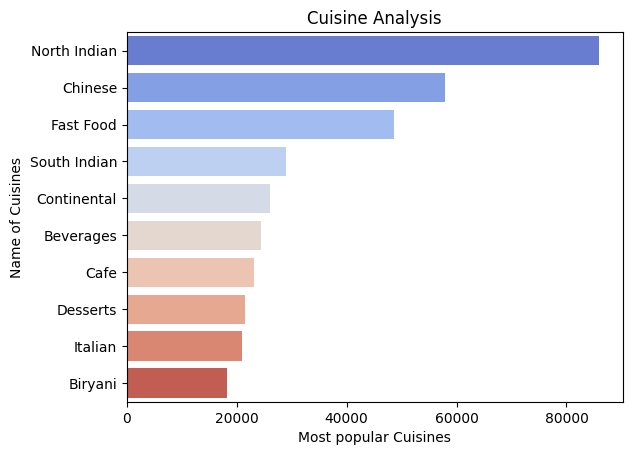

In [19]:
cuis=data['cuisines'].astype(str).str.strip("[]").str.split(',').explode().str.strip().str.strip("'")
all=cuis.explode()
total=all.value_counts().head(10)
sns.barplot(x=total.values, y=total.index, palette='coolwarm')
plt.xlabel('Most popular Cuisines')
plt.ylabel('Name of Cuisines')
plt.title('Cuisine Analysis')

In this figure we can see that most popular cuisine among the restaurants

In [20]:
voc_data=data.explode('cuisines')
cuis_rate=voc_data[voc_data['cuisines'].isin(total.index)].groupby('cuisines')['aggregate_rating'].mean().sort_values()

<ipython-input-21-16e8cf8204d2>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cuis_rate.values , y=cuis_rate.index , palette='coolwarm')


Text(0.5, 1.0, 'Correlation B/W Cuisines and rating')

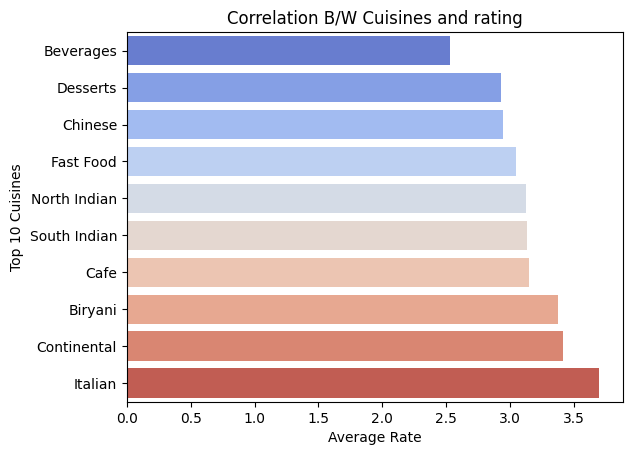

In [21]:
sns.barplot(x=cuis_rate.values , y=cuis_rate.index , palette='coolwarm')
plt.xlabel('Average Rate')
plt.ylabel('Top 10 Cuisines')
plt.title('Correlation B/W Cuisines and rating')

1. In the above figure we can see that the average rating for most popular cuisine among the restaurants.
2. There is good correlation between variety of cuisines

 **Price Range and Rating:**

Analyze the relationship between price range and restaurant ratings.
 Visualize the average cost for two people in different price categories.

<ipython-input-22-5373bce67bc4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=relation_price.values, y=relation_price.index, palette='coolwarm')


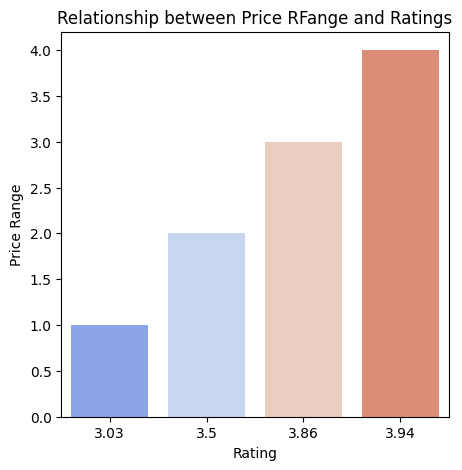

In [22]:
relation_price=data.groupby(['price_range'])['aggregate_rating'].mean().round(2)
plt.figure(figsize=(5,5))
sns.barplot(x=relation_price.values, y=relation_price.index, palette='coolwarm')
plt.xlabel("Rating")
plt.ylabel('Price Range')
plt.title('Relationship between Price RFange and Ratings')
plt.show()

1. There is positive relatioship between price range and rating.
2. Increase in the price cause good impact on rating.

<ipython-input-23-2e872062ecad>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x=range.index, y=range.values, palette='coolwarm')


Text(0, 0.5, 'Rating')

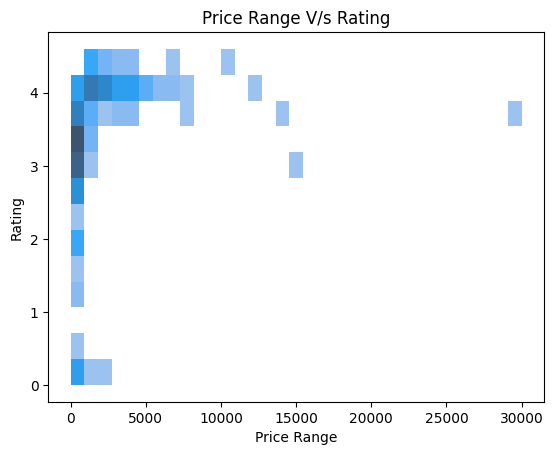

In [23]:
range=data.groupby(data['average_cost_for_two'])['aggregate_rating'].mean()
sns.histplot(x=range.index, y=range.values, palette='coolwarm')
plt.title('Price Range V/s Rating')
plt.xlabel('Price Range')
plt.ylabel('Rating')

1. In this figure we can see that same results of positive correlation but low price range restaurant also performing well.

<ipython-input-24-a7316fe28e88>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_dist.index, y=rating_dist.values, palette='coolwarm')


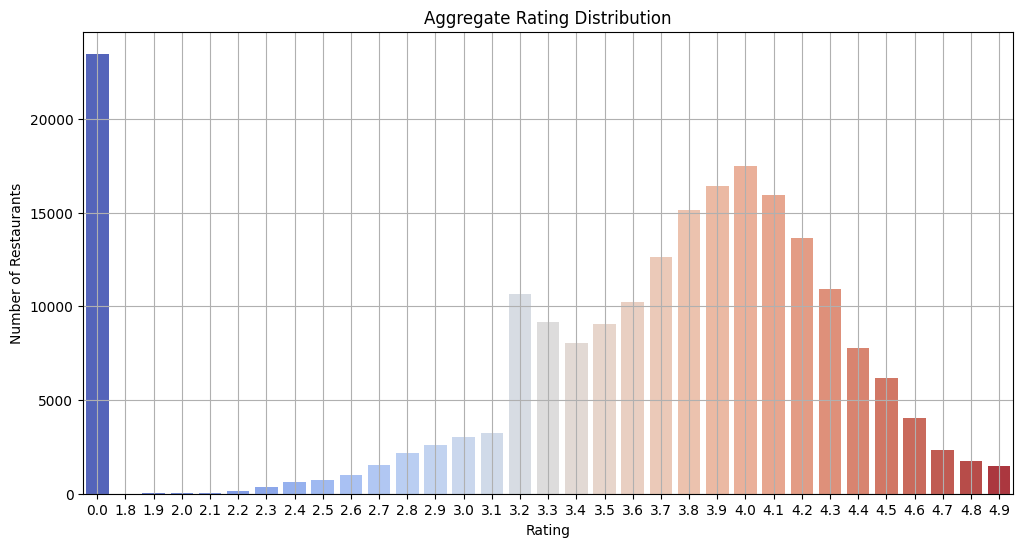

In [24]:
rating_dist = data['aggregate_rating'].astype(float).value_counts().sort_index()
plt.figure(figsize=(12,6))
sns.barplot(x=rating_dist.index, y=rating_dist.values, palette='coolwarm')
plt.title('Aggregate Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Number of Restaurants')
plt.grid()
plt.show()

This is the distribution of rating, restaurants in India is performing well.

<ipython-input-25-b2835f87be80>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data['establishment'], y=data['aggregate_rating'], palette='viridis')


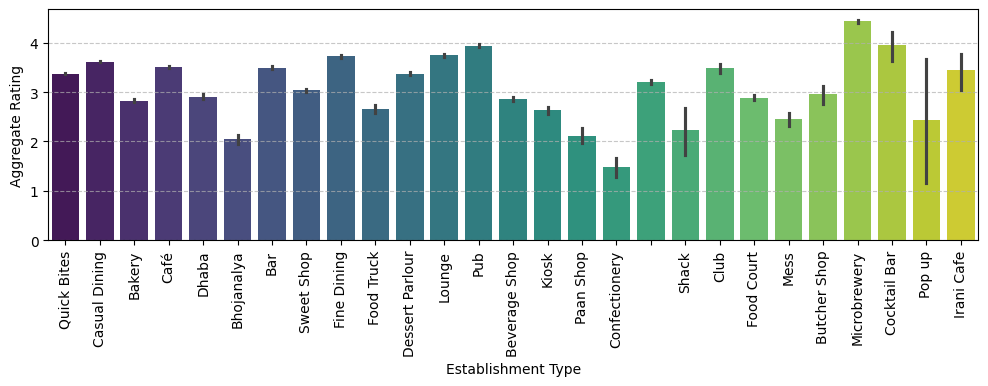

In [25]:
plt.figure(figsize=(12,3))
sns.barplot(x=data['establishment'], y=data['aggregate_rating'], palette='viridis')
plt.xticks(rotation=90)
plt.ylabel("Aggregate Rating")
plt.xlabel("Establishment Type")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

In the above figure we can see that, the relationship between rating and establishment type.

**Online Order and Table Booking:**

 Investigate the impact of online order availability on restaurant ratings.
 Analyze the distribution of restaurants that offer table booking.


In [26]:
data['highlights']=data['highlights'].str.strip("[]")
data['highlights']=data['highlights'].str.split(',')
explode_data=data.explode('highlights')
explode_data['highlights']=explode_data['highlights'].str.replace("'","").str.strip()

Text(0, 0.5, 'Rating')

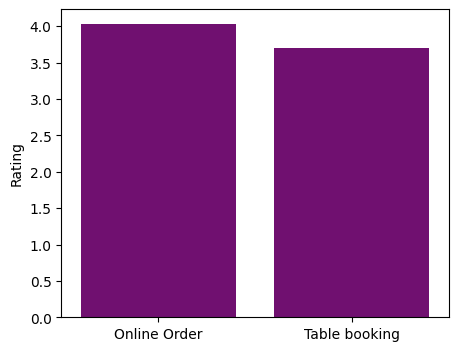

In [27]:
y1=explode_data[explode_data['highlights']=='Table booking recommended']['aggregate_rating'].mean()
y2=explode_data[explode_data['highlights']=='Delivery']['aggregate_rating'].mean()
plt.figure(figsize=(5,4))
sns.barplot(x=['Online Order', 'Table booking'], y=[y1, y2], color='purple')
plt.ylabel('Rating')



1. Restaurants with online orders have higher ratings, it suggests that online ordering has a positive impact on customer satisfaction.
2. Table booking restaurants have higher ratings, it may indicate that customers prefer pre-booking options.

Text(0, 0.5, 'No of service Provider')

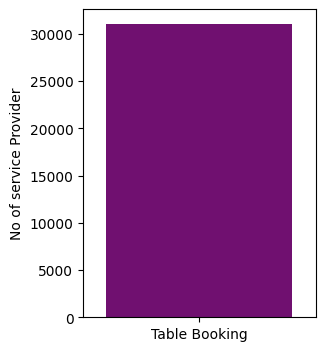

In [28]:
distribution=explode_data['highlights'].value_counts()['Table booking recommended']
plt.figure(figsize=(3,4))
sns.barplot(x=['Table Booking'], y=distribution, color='purple')
plt.ylabel('No of service Provider')

The number of restaurants that offer table booking vs.count.


**Top Restaurant Chains:**

Identify and visualize the top restaurant chains based on the number of outlets.
 Explore the ratings of these top chains.

<ipython-input-29-3b1b4c3478cc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Top_res.values, y=Top_res.index, palette='coolwarm')


<Axes: ylabel='name'>

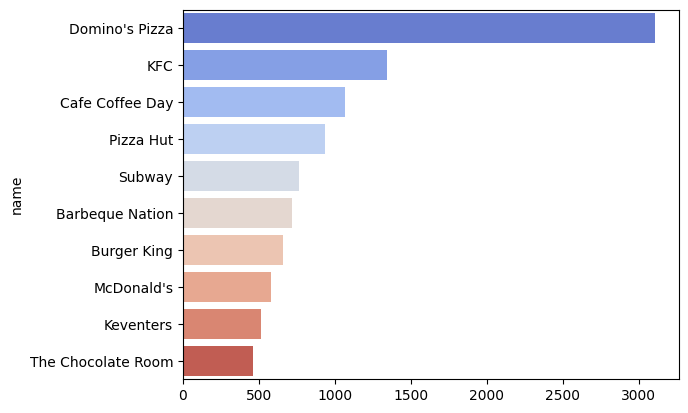

In [29]:
Top_res=data['name'].value_counts().head(10)
sns.barplot(x=Top_res.values, y=Top_res.index, palette='coolwarm')

 This analysis helps in understanding which restaurant brands dominate the market in terms of presence.


<ipython-input-30-4d494d66fc37>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_rate.index, x = top_rate.values, palette='coolwarm')


<Axes: ylabel='name'>

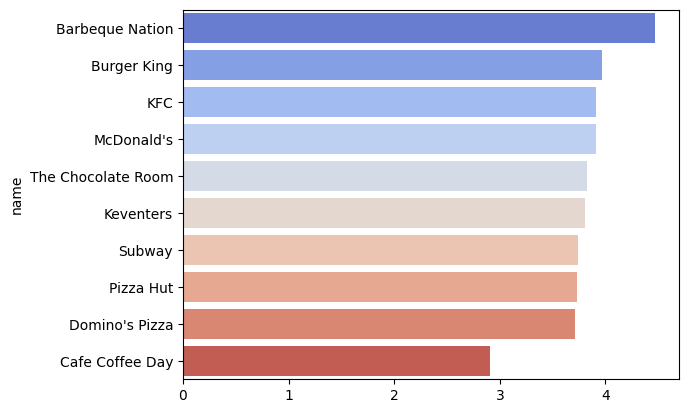

In [30]:
top_rate=data[data['name'].isin(Top_res.index)].groupby('name')['aggregate_rating'].mean().sort_values(ascending=False)
sns.barplot(y=top_rate.index, x = top_rate.values, palette='coolwarm')

1. Top chains with low ratings, indicating potential service issues
2. Larger chains maintain consistent or high ratings

**Restaurant Features:**

Analyze the distribution of restaurants based on features like Wi-Fi, Alcohol
 availability, etc.
 Investigate if the presence of certain features correlates with higher ratings.


<ipython-input-31-dcad154f7e70>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=immunity.values, y=immunity.index, palette='coolwarm')


Text(0.5, 1.0, 'Distribution Facility')

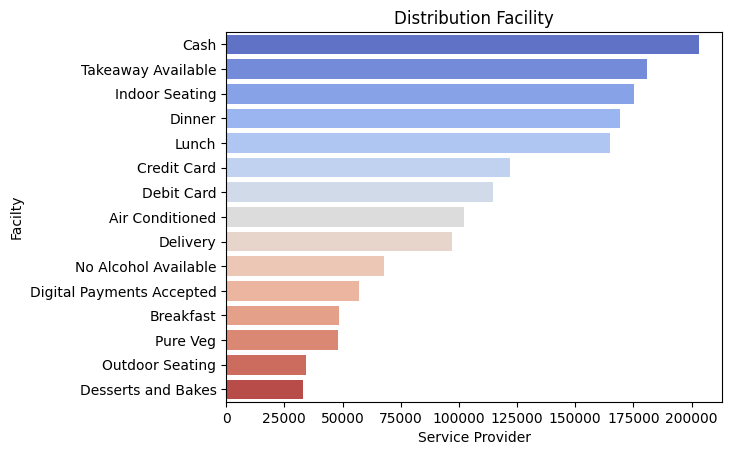

In [31]:
feature=data['highlights'].astype(str).str.strip("[]").str.replace("'", "").str.split(",").explode().str.strip().str.strip('"').str.strip()
immunity=feature.value_counts().head(15)
sns.barplot(x=immunity.values, y=immunity.index, palette='coolwarm')
plt.ylabel('Facilty')
plt.xlabel('Service Provider')
plt.title('Distribution Facility')

 It helps understand what amenities restaurants typically offer to attract customers.

<ipython-input-32-3128673101e3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr.values, y=corr.index, palette='coolwarm')


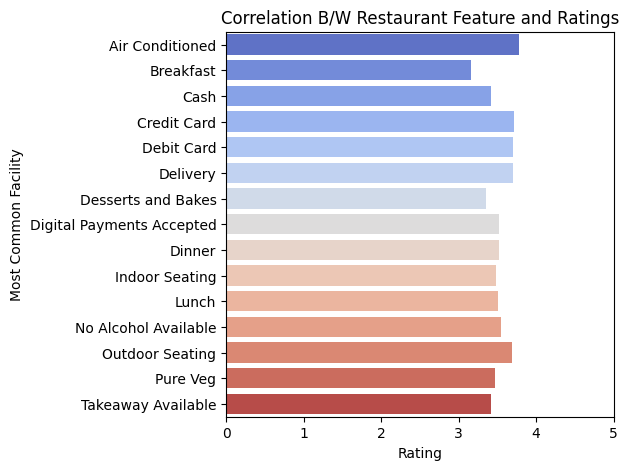

In [32]:
corr=explode_data[explode_data['highlights'].isin(immunity.index)].groupby(['highlights'])['aggregate_rating'].mean()
plt.figure(figsize=(5,5))
sns.barplot(x=corr.values, y=corr.index, palette='coolwarm')
plt.xlim(0,5)
plt.xlabel('Rating')
plt.ylabel('Most Common Facility')
plt.title('Correlation B/W Restaurant Feature and Ratings')
plt.show()

 Restaurants with specific features have higher ratings, it suggests that customers value these amenities.

**Word Cloud for Reviews:**

 Create a word cloud based on customer reviews to identify common positive
 and negative sentiments.
 Analyze frequently mentioned words and sentiments.

In [33]:
from wordcloud import WordCloud, STOPWORDS
text=' '.join(i for i in data['rating_text'])
wordcloud=WordCloud(background_color='white', width=900,height=1000).generate(text)

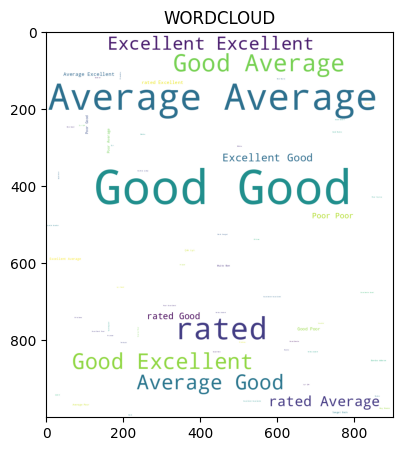

In [34]:
plt.figure(figsize=(10,5))
plt.title("WORDCLOUD")
plt.imshow(wordcloud)

#**Conclusion & Recommendations**


**Key Findings & Insights:**
1. Impact of Online Ordering & Table Booking on Ratings

    Restaurants offering online ordering generally have higher ratings, indicating that customers value convenience.

    Restaurants with table booking options also tend to have better ratings, showing that customers prefer making reservations in advance.

2. Top Restaurant Chains & Their Ratings

    The most widespread chains were identified based on the number of outlets.

    While some chains maintained high ratings, others struggled with inconsistent customer satisfaction across locations.

3. Restaurant Features & Their Influence on Ratings

    Features like Wi-Fi, Alcohol service, and Outdoor Seating were analyzed.

    Certain features correlated with higher ratings, suggesting they enhance customer experience.

4. City-Wise Ratings & Trends

    Some cities had higher average restaurant ratings than others, possibly due to better dining culture, competition, or customer expectations.

    Cities with lower ratings may indicate a lack of quality control or fewer high-end dining options.

**Recommendations for Restaurant Owners:**

1. Prioritize online ordering & table booking to attract more customers and improve ratings.

2. Ensure consistency in quality & service across multiple outlets to maintain strong brand reputation.

3. Invest in key features like Wi-Fi, comfortable seating, and alcohol service if aligned with the target audience.

4. Monitor customer feedback & ratings regularly to make improvements and stay competitive.

**Recommendations for Zomato Users:**

1. Look for restaurants with high ratings and key amenities like Wi-Fi or table booking for a better experience.

2. Prefer restaurants that offer online ordering for convenience and faster service.

3. Consider exploring top-rated restaurant chains for consistent quality and service.

This analysis provides valuable insights into what makes a restaurant successful and how both businesses and customers can make better decisions based on data.